In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aprendizaje automatico/proyecto/sign_mnist_test/sign_mnist_test.csv')
train= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aprendizaje automatico/proyecto/sign_mnist_train/sign_mnist_train.csv')

In [5]:
#Convertimos cada dato del dataset a un arreglo
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

In [6]:
# Definimos una lista con el fin de visualizar mejor abecedario
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


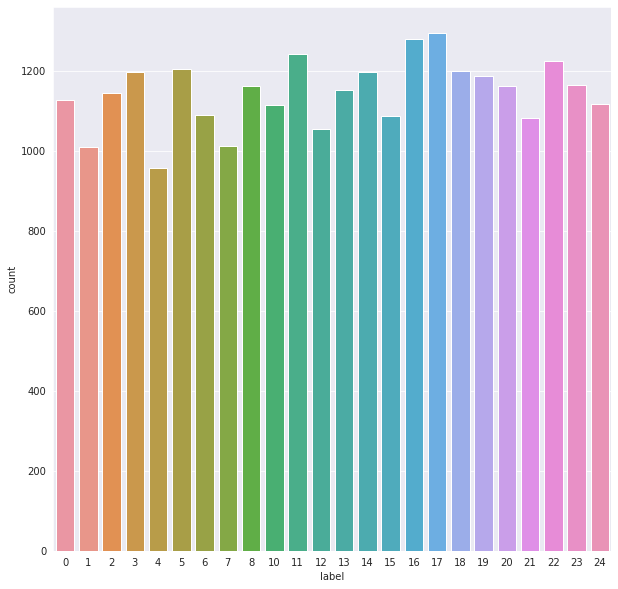

In [7]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train['label'])

In [8]:
#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

#Convert y to categorical if planning on using categorical cross entropy
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

#Reshape for the neural network
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

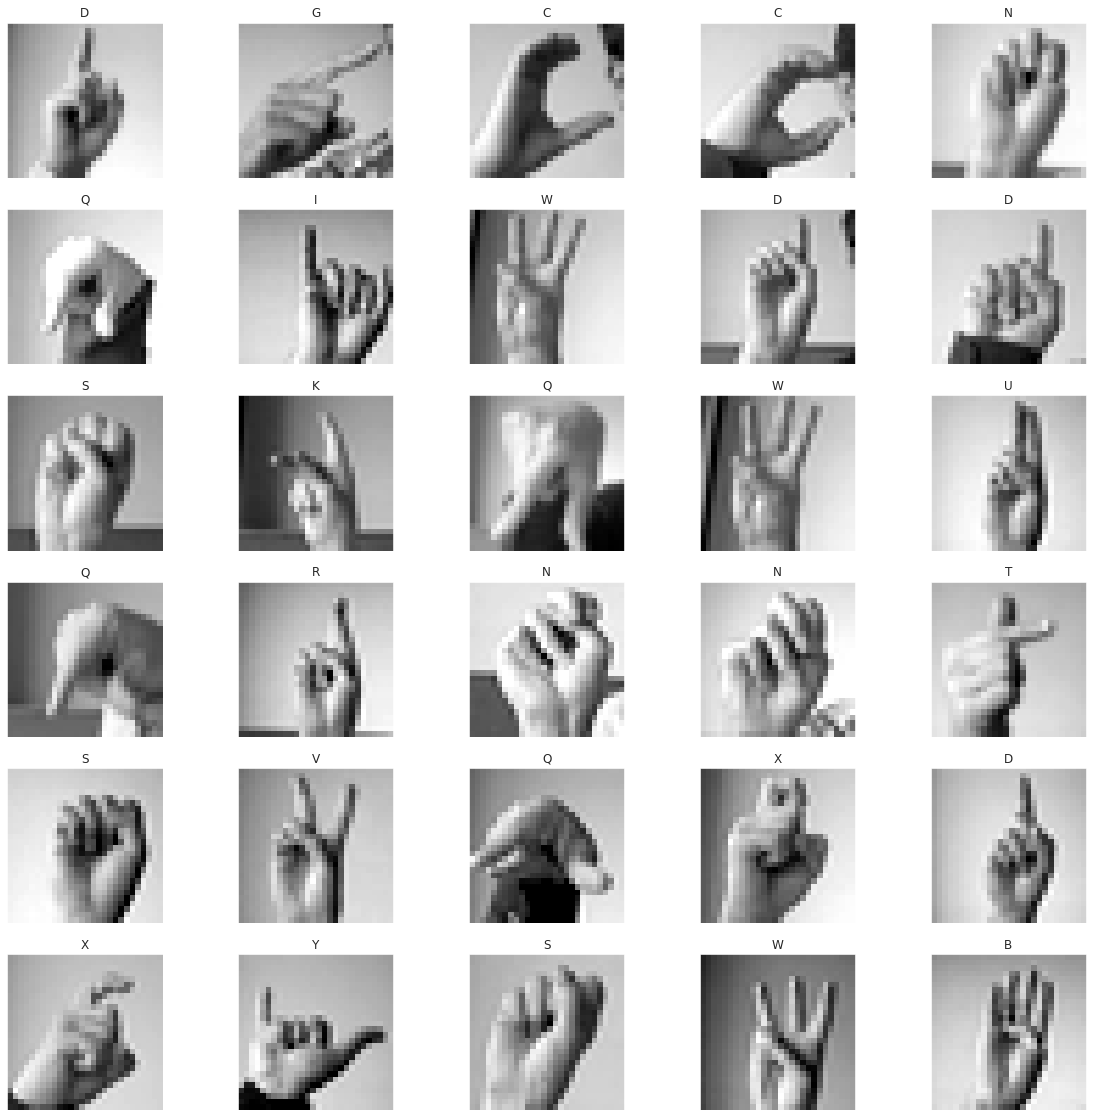

In [9]:
plt.figure(figsize=(20,20))
for i in range(0,30):
    plt.subplot(6,5,i+1)
    plt.imshow(train_data[i,1:].reshape(28,28),cmap='gray')
    plt.title(class_names[int(train_data[i,0])])
    plt.xticks(())
    plt.yticks(())

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# Con aumento de datos para evitar el sobreajuste

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,   
        samplewise_std_normalization=False,   
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(X_train)

In [11]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1) ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(25, activation='softmax'))

In [13]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [14]:
from datetime import datetime 
batch_size=16
start1 = datetime.now() 
history = model.fit(datagen.flow(X_train,y_train_cat, batch_size = 128) ,
                    epochs = 10 , validation_data = (X_test, y_test_cat) , 
                    callbacks = [learning_rate_reduction])

stop1 = datetime.now()
#Execution time of the model 
execution_time = stop1-start1
print("Execution time is: ", execution_time)

Epoch 1/10
215/215 [==============================] - 19s 36ms/step - loss: 2.9846 - accuracy: 0.1024 - val_loss: 2.1590 - val_accuracy: 0.3097 - lr: 0.0010
Epoch 2/10
215/215 [==============================] - 7s 34ms/step - loss: 1.9828 - accuracy: 0.3541 - val_loss: 1.2538 - val_accuracy: 0.5864 - lr: 0.0010
Epoch 3/10
215/215 [==============================] - 7s 34ms/step - loss: 1.4120 - accuracy: 0.5231 - val_loss: 0.7833 - val_accuracy: 0.7429 - lr: 0.0010
Epoch 4/10
215/215 [==============================] - 7s 34ms/step - loss: 1.1022 - accuracy: 0.6213 - val_loss: 0.6100 - val_accuracy: 0.8038 - lr: 0.0010
Epoch 5/10
215/215 [==============================] - 7s 34ms/step - loss: 0.9272 - accuracy: 0.6800 - val_loss: 0.4772 - val_accuracy: 0.8466 - lr: 0.0010
Epoch 6/10
215/215 [==============================] - 7s 34ms/step - loss: 0.8109 - accuracy: 0.7223 - val_loss: 0.3617 - val_accuracy: 0.8756 - lr: 0.0010
Epoch 7/10
215/215 [==============================] - 7s 34ms/s

In [15]:
print("Accuracy of the model is - " , model.evaluate(X_test, y_test_cat)[1]*100 , "%")

225/225 [==============================] - 1s 5ms/step - loss: 0.2074 - accuracy: 0.9334
Accuracy of the model is -  93.33519339561462 %


Text(0.5, 1.0, 'Accuracy evolution')

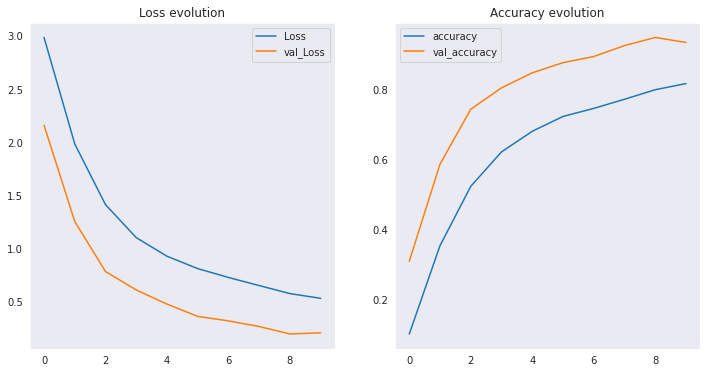

In [16]:
#Visualización del rendimiento del entrenamiento
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

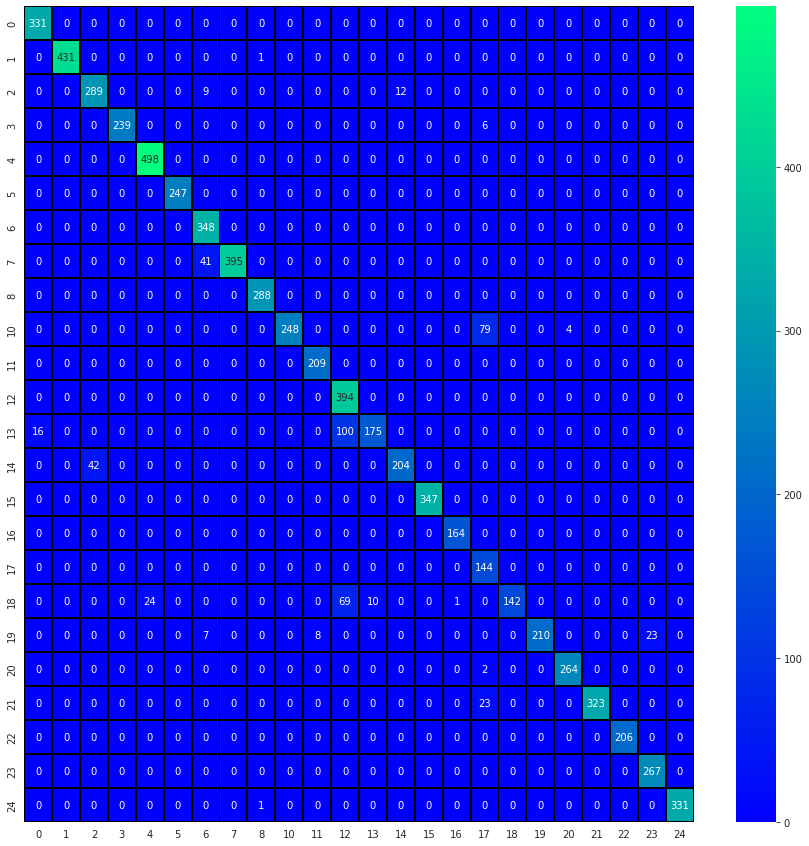

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

prediction=model.predict(X_test) 
y = test['label']
predictions=np.argmax(prediction,axis=1)
cm = confusion_matrix( y,predictions)
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "winter", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

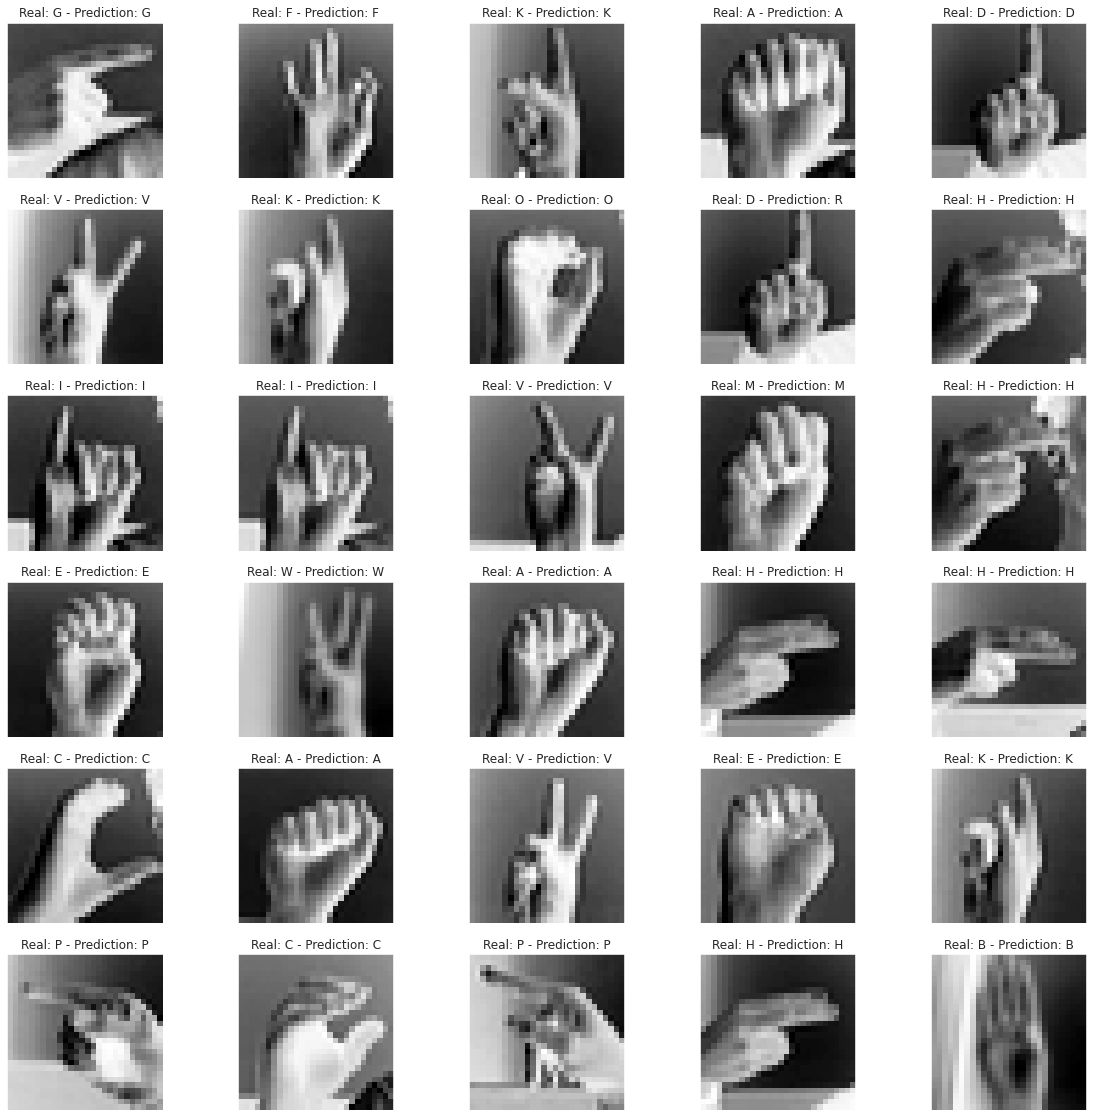

In [23]:
plt.figure(figsize=(20,20))
for i in range(0,30):
    plt.subplot(6,5,i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='Greys')
    plt.title("Real: {} - Prediction: {}".format(class_names[int(y_test[i])],class_names[int(predictions[i])]))
    plt.xticks(())
    plt.yticks(())

In [24]:
model.save('sign_model.h5')